In [3]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

* K: es el numero de exitos
* n: numero del espacio muestral
* p: probabilidad de exito

In [4]:
# definición de la distribución binomial 
#n : numero de lanzamientos
def my_binomial(k, n, p):
  return factorial(n)/(factorial(k)*(factorial(n-k)))*pow(p,k)*pow(1-p, n-k)

In [5]:
# realizando a mano tuvimos como resultado:
3/8

0.375

In [6]:

my_binomial(k=2,n=3,p=0.5)

0.375

In [7]:
# usando una funcion para la probabilidad binomial
print('my binomial: {}'.format(my_binomial(2, 3, 0.5)))
dist = binom(n=3, p=0.5)

# pmf: probability mass function
# k: numero de casos exitosos
dist.pmf(k=2)

my binomial: 0.375


0.3750000000000001

## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$


In [8]:
# realizando a mano tuvimos como resultado:
7/8

0.875

In [9]:
# cdf: Cumulative distribution function.
# x: son los casos de exito
dist.cdf(x=2)

0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [34]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
binomial(n, p)

2

In [35]:
# Vamos a hacer un experimento generando una muestra de conjuntos de lanzamientos de a 3 monedas
essays = []
for _ in range(100):
  essays.append(binomial(n, p))

In [37]:
print(essays)

[0, 3, 3, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 3, 1, 3, 2, 2, 1, 2, 3, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 0, 2, 3, 2, 3, 1, 1, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 2, 3, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 2, 1, 1, 1, 3, 2, 1, 0]


In [38]:
np.unique(essays, return_counts=True)

(array([0, 1, 2, 3]), array([15, 27, 47, 11], dtype=int64))

In [39]:
distribucion_simulada = np.unique(essays, return_counts=True)[1]/len(essays)
distribucion_simulada

array([0.15, 0.27, 0.47, 0.11])

In [41]:
# obtiendo las probabilidades de cada valor
values = [0,1,2,3]
distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]
distribucion_teorica

[0.125, 0.3750000000000001, 0.3750000000000001, 0.125]

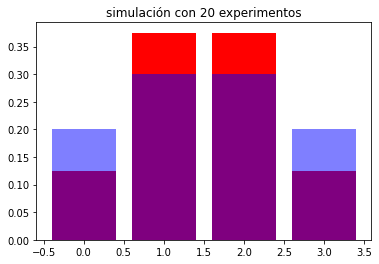

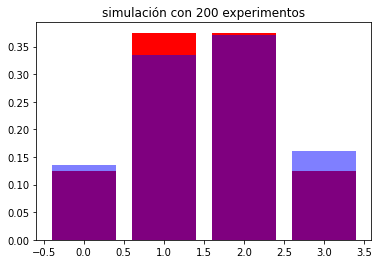

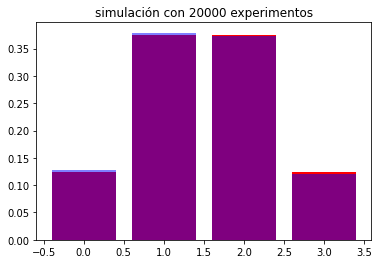

In [43]:
def plot_hist(num_trials):
  values = [0,1,2,3]
  arr = []
  for _ in range(num_trials):
    arr.append(binomial(3, 0.5))
  distribucion_simulada = np.unique(arr, return_counts=True)[1]/len(arr)
  distribucion_teorica = [binom(3, 0.5).pmf(k) for k in values]
  plt.bar(values, distribucion_teorica, label = 'teoría', color = 'red')
  plt.bar(values, distribucion_simulada, label = 'simulación', alpha = 0.5, color = 'blue')
  plt.title('simulación con {} experimentos'.format(num_trials))
  plt.show()

plot_hist(20)
plot_hist(200)
plot_hist(20000)